## Welcome

This is material for the **Probability and Regression** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)

### Packages needed

The first thing you need to do is install a few packages to make sure everything runs:

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)

## OLS

In [5]:
np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values

In [6]:
reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()
reg_tb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:32:25   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.1114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

In [10]:
tb.describe()

x             u             y         yhat1         yhat2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.009773      0.009435      0.166975      0.166975      0.166994   
std        0.998836      1.001239     13.289365      5.682040      5.682077   
min       -3.656440     -3.451403    -50.654682    -20.688875    -20.688991   
25%       -0.662925     -0.672294     -8.827691     -3.659775     -3.659781   
50%        0.008454      0.018803      0.242724      0.159473      0.159493   
75%        0.671809      0.688683      9.232769      3.933075      3.933119   
max        4.026849      4.168118     48.162716     23.018769     23.018936   

              uhat1         uhat2  
count  1.000000e+04  10000.000000  
mean  -1.691092e-16     -0.000019  
std    1.201339e+01     12.013394  
min   -4.142425e+01    -41.424248  
25%   -8.199882e+00     -8.199908  
50%    4.497835e-02      0.044993  
75%    8.147307e+00      8.147305  
max    5.000751e+01     50.007515

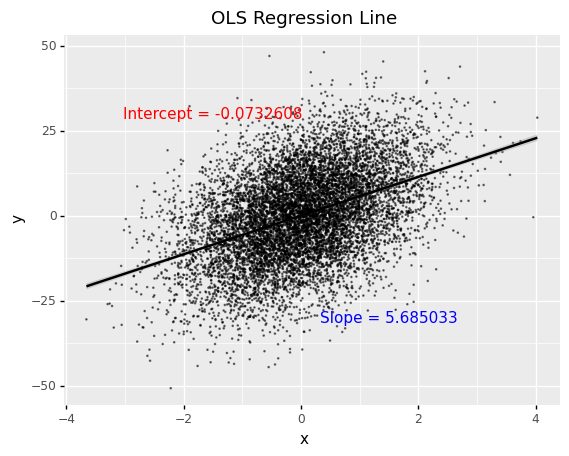

<ggplot: (8767801917814)>

In [11]:
p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

#### Questions:

-   What is the predicted value of $y$ when $x = 0$?
-   How much do we estimate $y$ increases by when $x$ increases by one unit?
-   Assume we y was the natural log of some variable, and x was the natural log of some variable.  How do we interpret the coefficient on $x$ if it is a log-log regression?

In [14]:
tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10),
    'u': 36*np.random.normal(size=10)})
tb['y'] = 3*tb['x'].values + 2*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

tb['yhat1'] = reg_tb.predict(tb)
tb['uhat1'] = reg_tb.resid

tb.describe()

x          u           y       yhat1         uhat1
count  10.000000  10.000000   10.000000   10.000000  1.000000e+01
mean    3.772858  11.864758   35.048090   35.048090 -1.705303e-14
std    11.744303  44.378718  100.939782   50.411890  8.744988e+01
min   -17.016464 -99.769970 -219.175919  -54.189135 -2.099337e+02
25%    -2.323519   7.698545   30.163378    8.879668 -1.324329e+01
50%     3.045288  13.852009   56.403079   31.925030  1.551309e+01
75%    10.172718  36.477803   99.425813   62.519200  4.858245e+01
max    23.674776  58.007424  124.853470  120.476173  1.011740e+02

#### Questions

-   What is the average of the residuals $\hat{u}$ from our regression?

In [15]:
coefs = np.zeros(1000)
for i in range(1000):
    tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10000),
    'u': 36*np.random.normal(size=10000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values

    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

    coefs[i] = reg_tb.params['x']

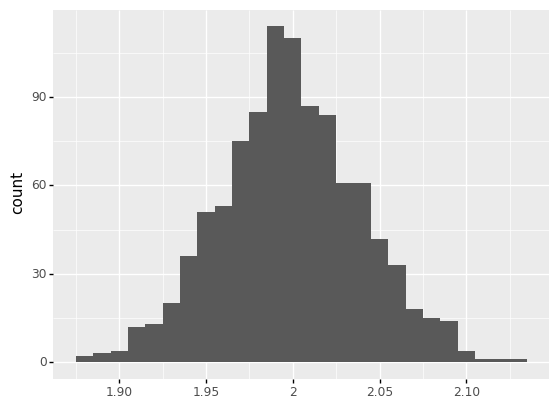

<ggplot: (8767772346076)>

In [16]:
p.ggplot() +\
  p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)

#### Questions

-   Explain the concept of unbiasedness in the context of this simulation?  
-   On average, do we think the estimate is close to the true value of $\beta_1 = 2$?

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


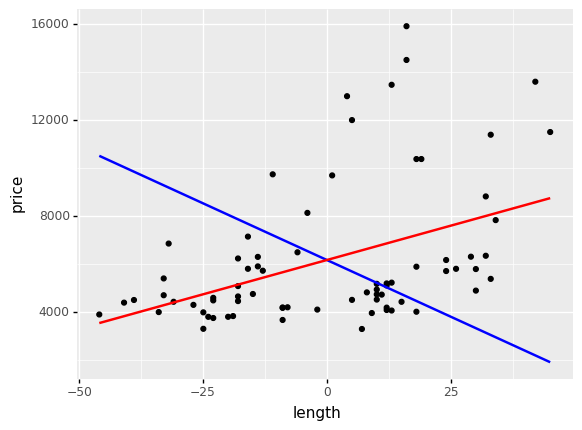

<ggplot: (8767770596440)>

In [25]:
auto = pd.read_stata('https://raw.github.com/scunning1975/mixtape/master/auto.dta')
auto['length'] = auto['length'] - auto['length'].mean()

lm1 = sm.OLS.from_formula('price ~ length', data=auto).fit()
lm2 = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', data=auto).fit()


coef_lm1 = lm1.params
coef_lm2 = lm2.params
resid_lm2 = lm2.resid

auto['y_single'] = coef_lm1[0] + coef_lm1[1]*auto['length']
auto['y_multi'] = coef_lm1[0] + coef_lm2[1]*auto['length']

p.ggplot(auto) +\
  p.geom_point(p.aes(x = 'length', y = 'price')) +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_multi'), color = "blue") +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_single'), color="red")

#### Questions

-   What happened to the coefficient on length after controlling for weight, headroom, and mpg in the regression?

## Clustering Standard Errors

### Cluster robust standard errors

People will try to scare you by challenging how you constructed your standard errors. Heteroskedastic errors, though, aren't the only thing you should be worried about when it comes to inference. Some phenomena do not affect observations individually, but they do affect groups of observations that involve individuals. And then they affect those individuals within the group in a common way. Say you want to estimate the effect of class size on student achievement, but you know that there exist unobservable things (like the teacher) that affect all the students equally. If we can commit to independence of these unobservables across classes, but individual student unobservables are correlated within a class, then we have a situation in which we need to cluster the standard errors. Before we dive into an example, I'd like to start with a simulation to illustrate the problem.

As a baseline for this simulation, let's begin by simulating nonclustered data and analyze least squares estimates of that nonclustered data. This will help firm up our understanding of the problems that occur with least squares when data is clustered.

First, I will create a function to generate our Monte Carlo simulation.

In [26]:
def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df


In [27]:
def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)


    return (b1, se, *b1_ci95)


In [28]:
n_sims = 1000
param = (.1, .5)
n = 1000
n_cluster = 50
rho = .5
cluster_robust = True

In [29]:
def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


In [30]:
# Simulation no clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, rho=0, cluster_robust = False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


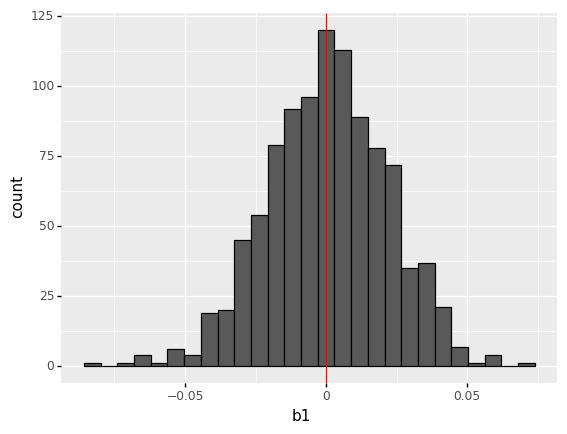

<ggplot: (8767769328918)>

In [31]:
p.ggplot(sim_nocluster, p.aes('b1')) +\
  p.geom_histogram(color = 'black') +\
  p.geom_vline(xintercept = sim_params[1], color = 'red')

In [18]:
sim_nocluster.sample(100).sort_values('b1')

b1     se_b1  ci95_lower  ci95_upper  param_caught   id
765 -0.079756  0.023947   -0.126692   -0.032821         False  765
29  -0.054530  0.021139   -0.095962   -0.013098         False   29
782 -0.039275  0.022142   -0.082672    0.004123          True  782
998 -0.033568  0.021542   -0.075791    0.008654          True  998
583 -0.032468  0.024197   -0.079893    0.014957          True  583
..        ...       ...         ...         ...           ...  ...
602  0.037134  0.021910   -0.005809    0.080077          True  602
74   0.040907  0.025129   -0.008347    0.090160          True   74
732  0.045107  0.022044    0.001900    0.088314         False  732
131  0.046232  0.021842    0.003421    0.089042         False  131
596  0.047334  0.022015    0.004184    0.090484         False  596

[100 rows x 6 columns]

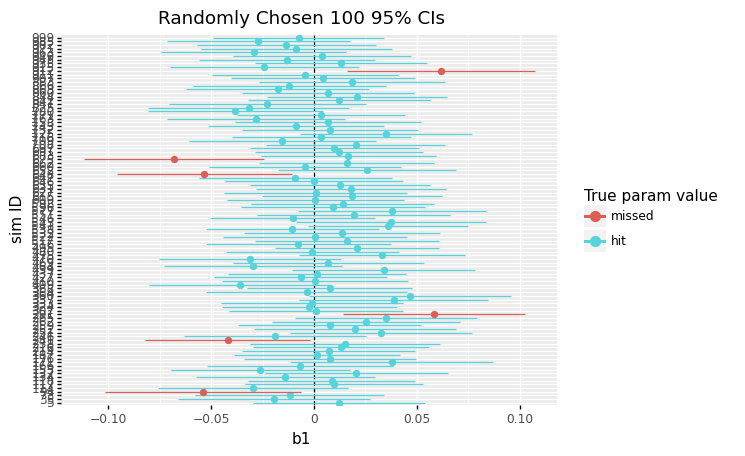

<ggplot: (8767772338917)>

In [32]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [33]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.03500000000000003

#### Questions:

-   What point does the least squares estimate appear to be centered on?
-   Setting the significance level at 5%, we should incorrectly reject the null that $\beta_1=0$ about 5% of the time in our simulations. About what percent of the time does the 95% confidence intervals contain the true value of $\beta_1 = 0$?

### Case 2: Clustered Data

Now let's resimulate our data with observations that are no longer independent draws in a given cluster of observations, but the true value of $\beta_1$ still is 0.

In [34]:
# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


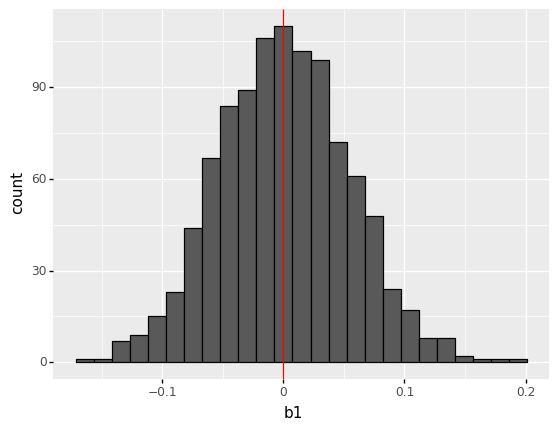

<ggplot: (8767772985399)>

In [35]:
p.ggplot(sim_nocluster, p.aes('b1')) +\
  p.geom_histogram(color = 'black') +\
  p.geom_vline(xintercept = sim_params[1], color = 'red')

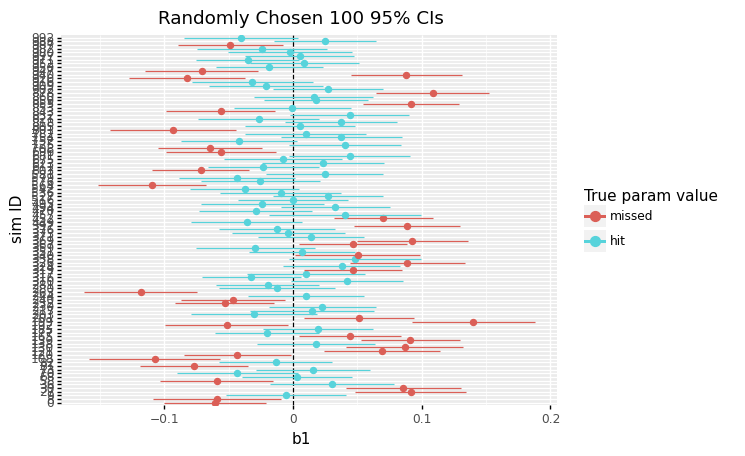

<ggplot: (8782122670141)>

In [23]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [36]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.42900000000000005

#### Questions:

-   When the errors are clustered, does the distribution of $\hat{\beta}_1$ estimates get wider or narrower?
-   When the errors are clustered, do we incorrectly reject the null more or less frequently?